In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import pandas as pd
from numpy import linalg as LA
from matplotlib.pyplot import cm

In [3]:
post_stats_3 = pd.io.parsers.read_csv("3_posterior.csv",sep=",",index_col=0)

In [4]:
post_stats_3

,x
corr[1],0.262480
corr[2],0.401543
corr[3],0.111519
"cov[1,1,1]",0.003750
"cov[1,1,2]",0.005501
"cov[1,1,3]",0.003383
"cov[1,2,1]",0.002656
"cov[1,2,2]",0.002085
"cov[1,2,3]",0.001611
"cov[2,1,1]",0.002656


In [5]:
df = pd.io.parsers.read_csv("data_with_coordinates.csv",sep=",",index_col=0)
df = df.dropna(subset=['census_tract'])
df.shape

(88752, 51)

In [6]:
N = 10000
coord_df = df[["Latitude", "Longitude"]]
np.max(np.array(coord_df["Longitude"]))

-73.700935

In [40]:
def plot_ellipse(coord_df, post_stats, K, fname):
    color = iter(cm.Set2(np.linspace(0, 1, K)))
    for k in range(1,K+1):
        cov_names = ["cov[" + str(i) + ","+ str(j) + "," + str(k) + "]" for i in range(1,3) for j in range(1,3)]
        cov = np.array(post_stats.loc[cov_names]['x'])
        cov = np.reshape(cov,[2,2])
        mu_x = post_stats.loc['muOfGaussian['+str(k)+',1]']['x']
        mu_y = post_stats.loc['muOfGaussian['+str(k)+',2]']['x']

        lambda_, v = np.linalg.eig(cov)
        lambda_ = np.sqrt(lambda_)
        ax = plt.subplot(111)
        c = next(color)
        for j in range(2):
            ell = Ellipse(xy=(mu_x, mu_y),
                          width=lambda_[0]*j*2, height=lambda_[1]*j*2,
                          angle=np.rad2deg(np.arccos(v[0, 0])),color=c)
            ell.set_facecolor('none')
            ax.add_artist(ell)

    plt.scatter(coord_df["Latitude"], coord_df["Longitude"],s=0.05,c="bisque")
    plt.show()
    plt.savefig(fname)

<ipython-input-40-76d11aedbfec>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


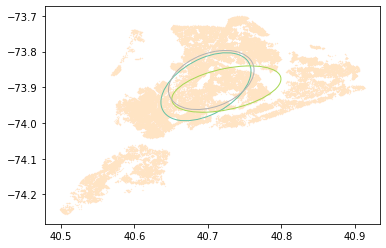

<Figure size 432x288 with 0 Axes>

In [41]:
plot_ellipse(coord_df, post_stats_3, 3, "3mixture.pdf")

<ipython-input-40-76d11aedbfec>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


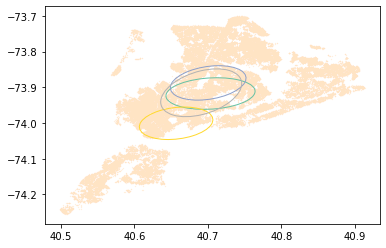

<Figure size 432x288 with 0 Axes>

In [42]:
post_stats_4 = pd.io.parsers.read_csv("4_posterior.csv",sep=",",index_col=0)
plot_ellipse(coord_df, post_stats_4, 4, "4mixture.pdf")

<ipython-input-40-76d11aedbfec>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


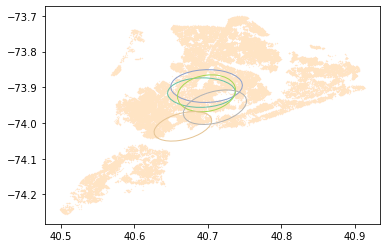

<Figure size 432x288 with 0 Axes>

In [43]:
post_stats_5 = pd.io.parsers.read_csv("5_posterior.csv",sep=",",index_col=0)
plot_ellipse(coord_df, post_stats_5, 5, "4mixture.pdf")

<ipython-input-40-76d11aedbfec>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


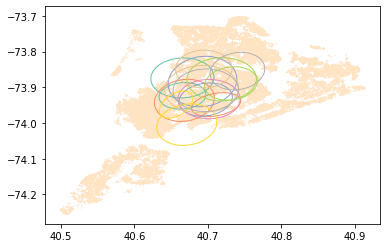

<Figure size 432x288 with 0 Axes>

In [44]:
post_stats_15 = pd.io.parsers.read_csv("15_posterior.csv",sep=",",index_col=0)
plot_ellipse(coord_df, post_stats_15, 15, "4mixture.pdf")

<ipython-input-40-76d11aedbfec>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


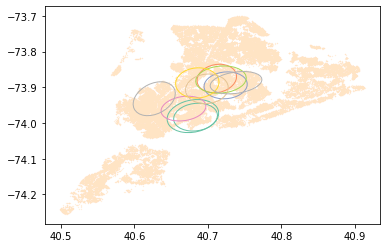

<Figure size 432x288 with 0 Axes>

In [45]:
post_stats_10 = pd.io.parsers.read_csv("10_posterior.csv",sep=",",index_col=0)
plot_ellipse(coord_df, post_stats_10, 10, "4mixture.pdf")